# 4. Modeling 

## 4.1 Import of relevant Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

sns.set()

%matplotlib inline

## 4.2 Read Data

In [3]:
data = pd.read_csv('dataset_dummies.csv') # file is generated in notebook_1

In [4]:
data.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,pct_paid_insurance
0,1,0,1,0,0,0,1,0,0,0,...,53300,0,1,1,2,6510,13020,52080,1,0.986035
1,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,780,780,3510,1,0.605523
2,0,0,0,0,0,0,0,0,1,0,...,35100,0,3,2,3,7700,3850,23100,0,0.942280
3,1,0,0,0,0,0,0,0,1,1,...,48900,-62400,1,1,2,6340,6340,50720,1,0.968454
4,0,1,1,0,0,0,0,0,0,0,...,66000,-46000,1,0,1,1300,650,4550,0,0.846154


## 4.3 Data Preparation for Modeling

In [5]:
target = data.fraud_reported
features = data.drop('fraud_reported', axis=1)

In [6]:
# Split data in training and test datasets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=365)

In [7]:
x_train.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,pct_paid_insurance
908,1,0,1,0,0,0,1,0,0,0,...,0,52600,0,1,1,0,500,500,4500,0.636364
591,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,2,1,7270,21810,50890,0.993748
836,0,0,0,0,0,1,0,0,0,0,...,0,52100,0,1,0,1,21330,7110,56880,0.988279
145,0,0,0,0,0,0,0,0,0,0,...,0,0,-57900,1,2,1,7640,15280,76400,0.994966
606,0,1,0,0,0,0,0,0,0,0,...,0,0,-66200,1,0,3,5750,5750,46000,0.982609


In [8]:
# Scale data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# distribution of target in train data
y_train.value_counts()

0    596
1    204
Name: fraud_reported, dtype: int64

In [10]:
# distribution of target in test datat
y_test.value_counts()

0    157
1     43
Name: fraud_reported, dtype: int64

# 4.4 Modeling and Evaluation

### 4.4.1 Logistic regression

In [11]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [12]:
# train data
print(classification_report(y_train, logreg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       596
           1       0.79      0.75      0.77       204

    accuracy                           0.89       800
   macro avg       0.85      0.84      0.85       800
weighted avg       0.88      0.89      0.88       800



In [13]:
# train data
print('Accuracy:', accuracy_score(y_train, logreg.predict(x_train))*100)
print('Precision:', precision_score(y_train, logreg.predict(x_train))*100)
print('Recall:', recall_score(y_train, logreg.predict(x_train))*100)

Accuracy: 88.5
Precision: 78.8659793814433
Recall: 75.0


In [14]:
# test data
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       157
           1       0.67      0.65      0.66        43

    accuracy                           0.85       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.85      0.85      0.85       200



In [15]:
# test data
print('Accuracy:', accuracy_score(y_test, logreg.predict(x_test))*100)
print('Precision:', precision_score(y_test, logreg.predict(x_test))*100)
print('Recall:', recall_score(y_test, logreg.predict(x_test))*100)

Accuracy: 85.5
Precision: 66.66666666666666
Recall: 65.11627906976744


In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg.predict(x_test)).ravel() 
print(tn, fp, fn, tp)

143 14 15 28


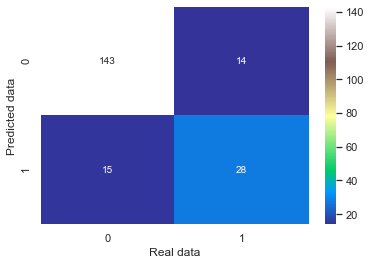

In [17]:
cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

In [18]:
logreg.intercept_

array([-1.87199801])

In [19]:
logreg.coef_

array([[ 5.80290586e-02, -2.37429629e-01, -3.18975936e-02,
         1.03264901e-01,  1.57395846e-02,  1.54412249e-01,
         9.98550038e-02,  1.01734974e-01,  1.65847423e-01,
         7.04430787e-02,  2.21983720e-01,  2.75034627e-01,
         6.08030524e-02, -8.57181314e-02,  6.39780307e-02,
        -1.53624306e-01, -4.61802683e-02,  1.51000581e-01,
        -5.51566389e-02,  5.90062519e-02, -8.83889618e-03,
        -8.20083809e-03, -1.42216723e-01,  1.90073855e-02,
        -2.16204990e-01, -4.62653155e-01,  7.95035036e-01,
         5.66640168e-01, -3.05200290e-01, -2.31887634e-01,
        -8.43891138e-02, -9.43983125e-02, -3.03973994e-01,
        -9.70096772e-02, -2.00177795e-01, -5.26322421e-02,
        -1.90789105e-02, -1.19299001e-01, -2.22788639e-01,
         8.18201612e-03,  2.03631238e-01,  3.87350193e-01,
         4.07693675e-01, -2.79170918e-02,  2.25397475e-01,
         1.85538456e-01, -1.95996214e-01, -1.87436352e-01,
        -2.87031385e-01,  1.41595895e-01, -1.11191352e-0

### 4.4.2 Decision Tree

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
# train data
print(classification_report(y_train, tree.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       204

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [22]:
# train data
print('Accuracy:', accuracy_score(y_train, tree.predict(x_train))*100)
print('Precision:', precision_score(y_train, tree.predict(x_train))*100)
print('Recall:', recall_score(y_train, tree.predict(x_train))*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


In [23]:
# test data
print(classification_report(y_test, tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.39      0.35      0.37        43

    accuracy                           0.74       200
   macro avg       0.61      0.60      0.61       200
weighted avg       0.73      0.74      0.74       200



In [24]:
# test data
print('Accuracy:', accuracy_score(y_test, tree.predict(x_test))*100)
print('Precision:', precision_score(y_test, tree.predict(x_test))*100)
print('Recall:', recall_score(y_test, tree.predict(x_test))*100)

Accuracy: 74.5
Precision: 39.473684210526315
Recall: 34.883720930232556


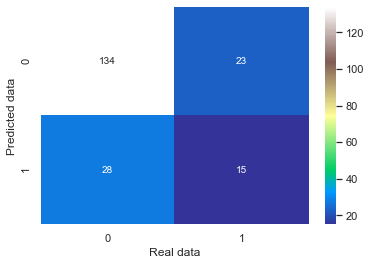

In [25]:
cm = confusion_matrix(y_test, tree.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

### 4.4.3 Random Forest

In [26]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
# train data
print(classification_report(y_train, forest.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       204

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [28]:
# train data
print('Accuracy:', accuracy_score(y_train, forest.predict(x_train))*100)
print('Precision:', precision_score(y_train, forest.predict(x_train))*100)
print('Recall:', recall_score(y_train, forest.predict(x_train))*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


In [29]:
# test data
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.85       157
           1       0.23      0.07      0.11        43

    accuracy                           0.75       200
   macro avg       0.51      0.50      0.48       200
weighted avg       0.67      0.75      0.69       200



In [30]:
# test data
print('Accuracy:', accuracy_score(y_test, forest.predict(x_test))*100)
print('Precision:', precision_score(y_test, forest.predict(x_test))*100)
print('Recall:', recall_score(y_test, forest.predict(x_test))*100)

Accuracy: 75.0
Precision: 23.076923076923077
Recall: 6.976744186046512


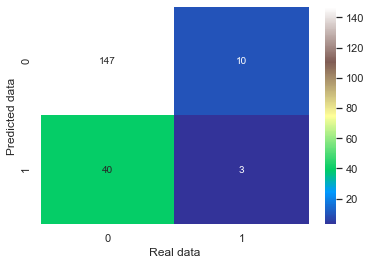

In [31]:
cm = confusion_matrix(y_test, forest.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

### 4.4.4 Support Vector Machine

In [32]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [33]:
# train data
print(classification_report(y_train, svc.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       596
           1       0.95      0.75      0.84       204

    accuracy                           0.93       800
   macro avg       0.94      0.87      0.90       800
weighted avg       0.93      0.93      0.92       800



In [34]:
# train data
print('Accuracy:', accuracy_score(y_train, svc.predict(x_train))*100)
print('Precision:', precision_score(y_train, svc.predict(x_train))*100)
print('Recall:', recall_score(y_train, svc.predict(x_train))*100)

Accuracy: 92.625
Precision: 95.03105590062113
Recall: 75.0


In [35]:
# test data
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       157
           1       0.89      0.37      0.52        43

    accuracy                           0.85       200
   macro avg       0.87      0.68      0.72       200
weighted avg       0.86      0.85      0.83       200



In [36]:
# test data
print('Accuracy:', accuracy_score(y_test, svc.predict(x_test))*100)
print('Precision:', precision_score(y_test, svc.predict(x_test))*100)
print('Recall:', recall_score(y_test, svc.predict(x_test))*100)

Accuracy: 85.5
Precision: 88.88888888888889
Recall: 37.2093023255814


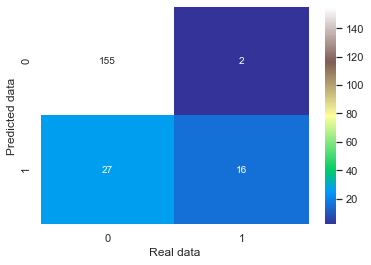

In [37]:
cm = confusion_matrix(y_test, svc.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

# 5. Deployment

In [43]:
# Select one scaled person of the dataset
sample_df = x_test[72]

In [44]:
# Features of the selected sample
sample_df

array([ 1.35903462, -0.65270587,  1.10833761, -0.37363236, -0.42828957,
        2.30200187, -0.41181385, -0.40137644, -0.38655567, -0.27958383,
       -0.30478874, -0.28730468, -0.24413654, -0.24124895, -0.31207962,
       -0.26636529, -0.26636529, -0.30478874, -0.26636529, -0.28217394,
       -0.28984624,  3.79270555, -0.18328047, -0.22941573, -0.24983394,
       -0.24124895, -0.22331316,  5.06622805, -0.21707238, -0.24699789,
       -0.23241869, -0.24413654, -0.23833416, -0.23833416, -0.23833416,
       -0.22021079, -0.25264558, -0.22021079, -0.19044535, -0.2353911 ,
       -0.24983394,  2.19986728, -0.47248449, -0.46255869, -0.40973554,
       -0.43033148, -0.27958383, -0.82502865, -0.31926223, -0.91370804,
       -0.6352234 , -0.74390729,  1.60356745, -0.29488391, -0.51752183,
       -0.29738086, -0.50780078, -0.65660263, -0.6644106 , -0.67419986,
       -1.6511054 , -1.04810348,  0.18475885, -0.48560679, -0.92537512,
        0.963709  ,  1.11630666, -1.18253256,  0.45167913,  0.85

In [45]:
# Execute prediction
sample_pred = svc.predict([sample_df])

In [46]:
# Interpret the result
def check_prediction(pred):
    if pred[0] == 1:
        print("Fraud.")
    else:
        print("No Fraud.")

In [47]:
# call the prediciton method
check_prediction(sample_pred)

Fraud.
